
**Final Project

File: DSC530_RNERALLA_Final_Project.py (.ipynb)
Name: Ravindra Neralla
Date: 05/30/2020
Course: DSC 530 Data Exploration and Analysis
Assignment: Final Project Analysis

In [1]:
#Import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing and tranformation
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For creating plots
import os
%matplotlib inline

# Input data files are available in the "../input/" directory.

#print(os.listdir("D:/Bellevue/Sem2/EDA/Final_Project"))
teleco_data = pd.read_csv('D:/Bellevue/Sem2/EDA/Final_Project/Telco-Customer-Churn.csv')
# verify few sample records
teleco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# get the columns and data types
teleco_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

From the above result, there were no records with null values also TotalCharges data type is object.


In [3]:
#Remove customer IDs from the data set, not useful in analysis
telco_df = teleco_data.iloc[:,1:]
#Converting the churn variable from string to numeric variable
telco_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Converting the gender variable from string to numeric variable
telco_df['Churn'].replace(to_replace='Male', value=1, inplace=True)
telco_df['Churn'].replace(to_replace='Female',  value=0, inplace=True)


#Converting the partner variable from string to numeric variable
telco_df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
telco_df['Partner'].replace(to_replace='No',  value=0, inplace=True)

#Converting the dependents variable from string to numeric variable
telco_df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
telco_df['Dependents'].replace(to_replace='No',  value=0, inplace=True)

#Converting the phone service variable from string to numeric variable
telco_df['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)
telco_df['PhoneService'].replace(to_replace='No',  value=0, inplace=True)

# Get the data set summary
telco_df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,1.000000


In [4]:
# Get the median value
telco_df.median()


SeniorCitizen      0.00
Partner            0.00
Dependents         0.00
tenure            29.00
PhoneService       1.00
MonthlyCharges    70.35
Churn              0.00
dtype: float64

 **Histograms:
 Histograms helps in visualising the distribution of data with respect to variables

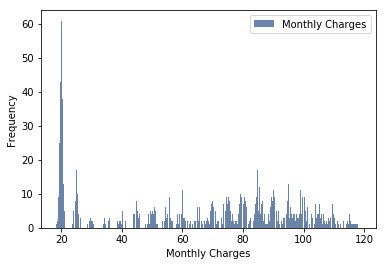

<Figure size 576x432 with 0 Axes>

In [5]:
# Importing thinkstats and thinkplot modules from standard course library
import thinkstats2
import thinkplot

# Histogram for MonthlyCharges variable
hist_monthlycharges = thinkstats2.Hist(telco_df.MonthlyCharges, label='Monthly Charges')
thinkplot.Hist(hist_monthlycharges)
thinkplot.Show(xlabel='Monthly Charges', ylabel='Frequency')

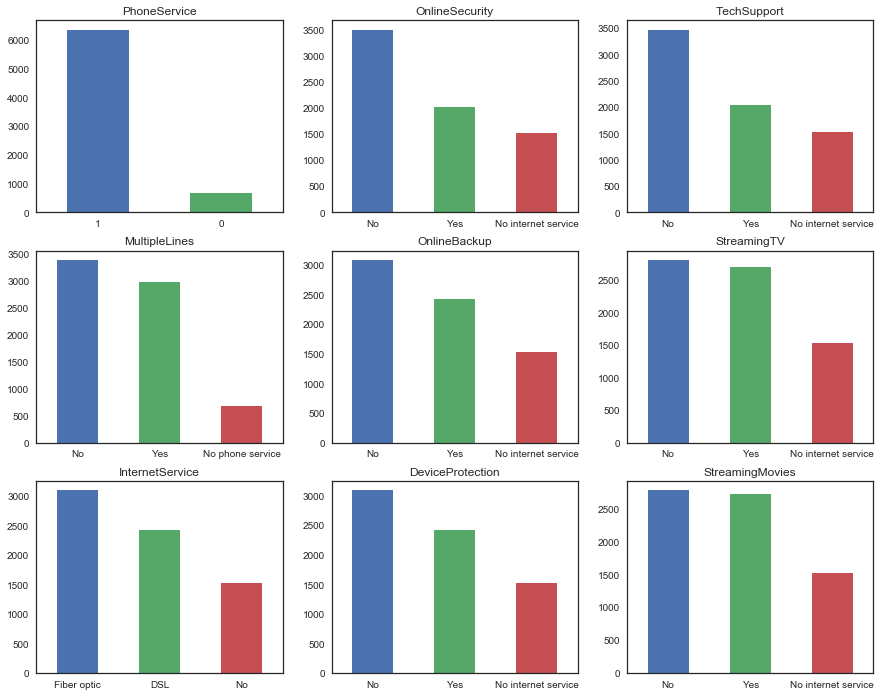

In [64]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telco_df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telco_df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telco_df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

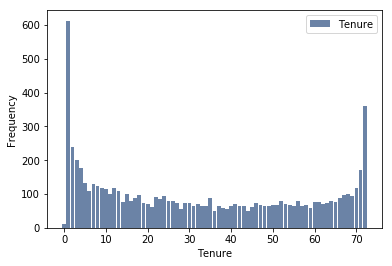

<Figure size 576x432 with 0 Axes>

In [8]:
# Histogram for Tenure variable
hist_tenure = thinkstats2.Hist(telco_df.tenure, label='Tenure')
thinkplot.Hist(hist_tenure)
thinkplot.Show(xlabel='Tenure', ylabel='Frequency')

**Customer Distribution based on Tenure:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Two Year Contract')

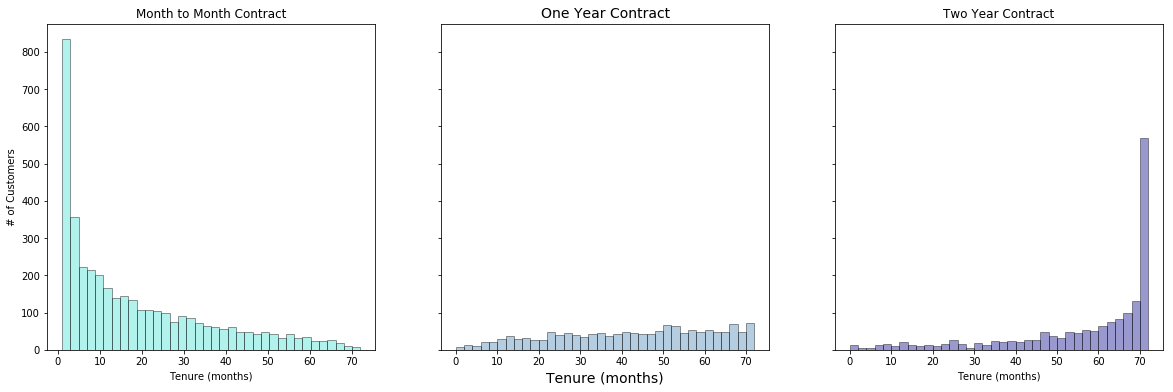

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telco_df[telco_df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telco_df[telco_df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telco_df[telco_df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

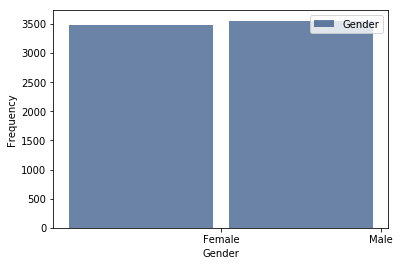

<Figure size 576x432 with 0 Axes>

In [9]:
# Histogram for Tenure variable
hist_gender = thinkstats2.Hist(telco_df.gender, label='Gender')
thinkplot.Hist(hist_gender)
thinkplot.Show(xlabel='Gender', ylabel='Frequency')

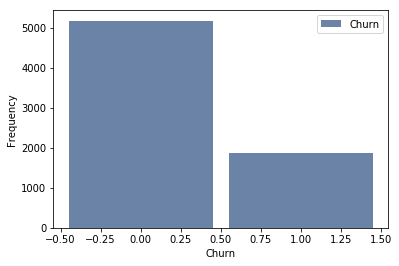

<Figure size 576x432 with 0 Axes>

In [11]:
# Histogram for Churn variable
hist_churn = thinkstats2.Hist(telco_df.Churn, label='Churn')
thinkplot.Hist(hist_churn)
thinkplot.Show(xlabel='Churn', ylabel='Frequency')

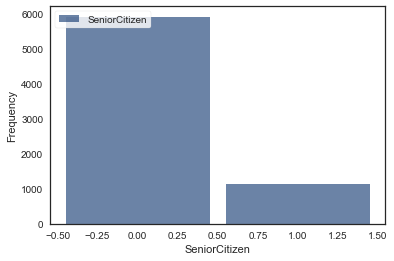

<Figure size 576x432 with 0 Axes>

In [63]:
# Histogram for Churn variable
hist_sc= thinkstats2.Hist(telco_df.SeniorCitizen, label='SeniorCitizen')
thinkplot.Hist(hist_sc)
thinkplot.Show(xlabel='SeniorCitizen', ylabel='Frequency')

**PMF

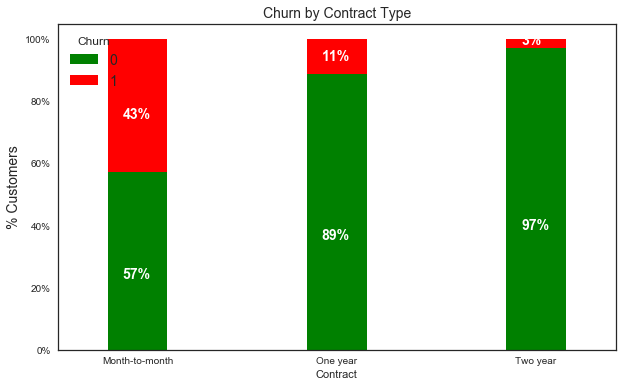

In [16]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')
colors = ['green','red']
contract_churn = telco_df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


From the above plot, we can observe that churn rate is high in customers on Month-to-Month contract.

Churn by Seniority:

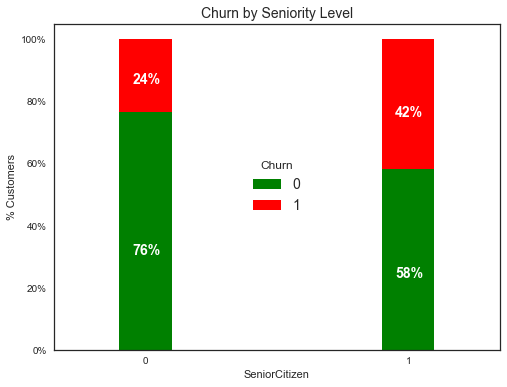

In [17]:
colors = ['green','red']
seniority_churn = telco_df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


Churn rate is high in younger customers, when compared to senior citizens

Text(0.5,1,'Distribution of monthly charges by churn')

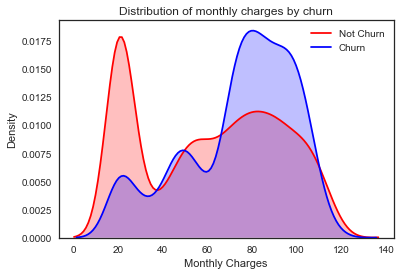

In [20]:
ax = sns.kdeplot(telco_df.MonthlyCharges[(telco_df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_df.MonthlyCharges[(telco_df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

churn rate is high among customers with high monthly charges.

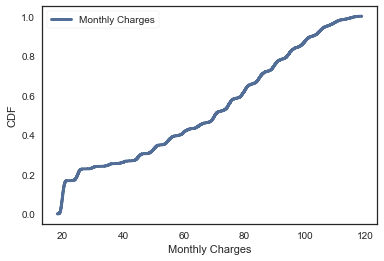

<Figure size 576x432 with 0 Axes>

In [22]:
# CDF for Monthly Charges variable
cdf = thinkstats2.Cdf(telco_df.MonthlyCharges, label='Monthly Charges')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Monthly Charges', ylabel='CDF')
plt.show()

Analytic Distribution

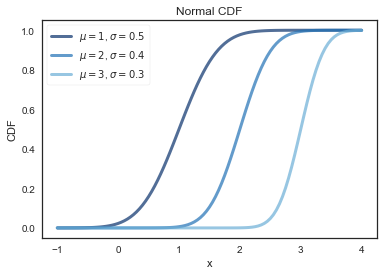

In [23]:
# Examples of Normal CDF for different Mean and Sigmas
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

**Model Vs Actual CDF curve for Monthly Charges variable

Mean, Var 64.75423246550007 902.095034369633
Sigma 30.034896942883506


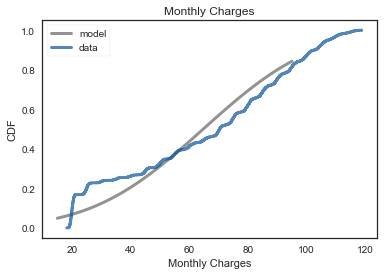

In [24]:
# estimate parameters: trimming outliers yields a better fit
# I'm trimming 0.1% data to avoid outliers influencing my analysis
mu, var = thinkstats2.TrimmedMeanVar(telco_df.MonthlyCharges, p=0.001)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=15, high=95)

thinkplot.Plot(xs, ps, label='model', color='0.4')

# plot the data
cdf = thinkstats2.Cdf(telco_df.MonthlyCharges, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Monthly Charges',
                 xlabel='Monthly Charges',
                 ylabel='CDF')

From the above plot, its clear that there is slight variation in the data compared to model, but model fits well with data.


**Normal Probability Plot

If MonthlyCharges variable is normally distributed then it forms a straight line on Normal probability plot.

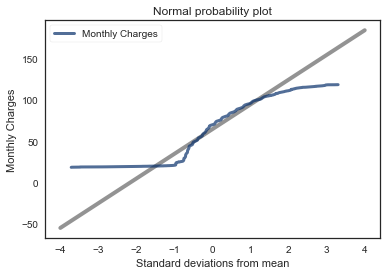

In [25]:
#Normal probability plot
mean, var = thinkstats2.TrimmedMeanVar(telco_df.MonthlyCharges, p=0.001)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.4')

xs, ys = thinkstats2.NormalProbability(telco_df.MonthlyCharges)
thinkplot.Plot(xs, ys, label='Monthly Charges')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Monthly Charges')

From the above plot, we can observe that MonthlyCharges variable  deviates from the model.

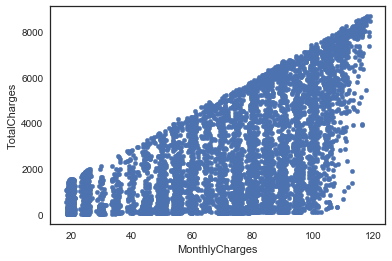

In [30]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')
telco_df.isnull().sum()
telco_df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

We can observe from the above plot that TotalCharges and MonthlyCharges are correlated positively

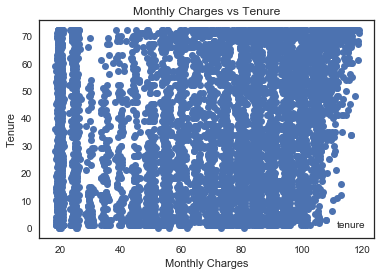

In [32]:
# Scatter plot between Monthly Charges and Tenure
telco_df.plot(x='MonthlyCharges', y='tenure', style='o')  
plt.title('Monthly Charges vs Tenure')  
plt.xlabel('Monthly Charges')  
plt.ylabel('Tenure')  
plt.show() 

**Covariance

In [33]:
# Function to calculate Covariance
# This function uses numpy's dot function
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


In [36]:
# Covariance between Age and Customer Churn
Cov(telco_df.SeniorCitizen, telco_df.Churn)

0.02455595734113294

In [37]:
# Covariance between Age and Customer Churn
Cov(telco_df.MonthlyCharges, telco_df.Churn)

2.5686847637569414

Covariance speaks only about the how two variables are related, to know the strength of the relationship, we need to calculate correlation.


**Pearson Correlation

In [38]:
# Correlation of all vaiables
telco_df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.220173,0.102411,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.096848,0.319072,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.113890,0.064653,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.247900,0.825880,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.247398,0.113008,0.011942
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.651065,1.000000,-0.199484
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.193356,-0.199484,1.000000


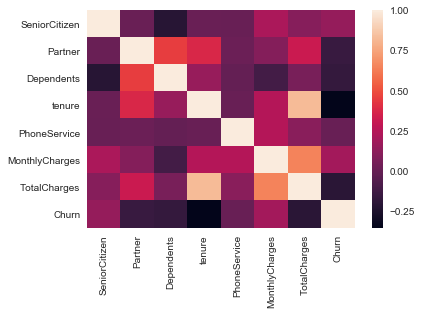

In [39]:
# Impoting seaborn for heatmap chart
import seaborn as sns
corr = telco_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

From the above heatmap, we can observe that SeniorCitizen variable has good correlation with churn rate.
Also note, Correlation only talks about linear relationships among variables. If the variables are non-linearly related then corr() doesn't show that relationship

In [40]:
# pandas provides corr() function with method='spearman' option for Spreaman correlation
telco_df.corr(method='spearman')

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.018556,0.008576,0.221067,0.107248,0.150889
Partner,0.016479,1.000000,0.452676,0.384931,0.017706,0.108463,0.343196,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.164175,-0.001762,-0.107011,0.082890,-0.164221
tenure,0.018556,0.384931,0.164175,1.000000,0.008483,0.276417,0.889177,-0.367062
PhoneService,0.008576,0.017706,-0.001762,0.008483,1.000000,0.239701,0.084910,0.011942
MonthlyCharges,0.221067,0.108463,-0.107011,0.276417,0.239701,1.000000,0.638032,0.184743
TotalCharges,0.107248,0.343196,0.082890,0.889177,0.084910,0.638032,1.000000,-0.232190
Churn,0.150889,-0.150448,-0.164221,-0.367062,0.011942,0.184743,-0.232190,1.000000


**Spearman's Correlation:

Spearman's Correlation explains the non-linear relationship between variables

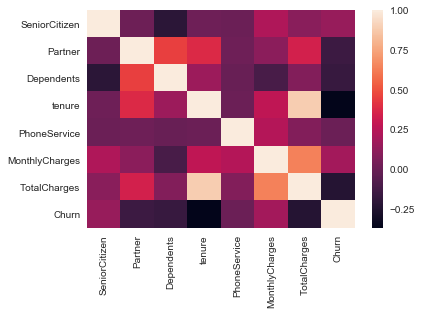

In [62]:
# Using seaborn for heatmap chart
corr = telco_df.corr(method='spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

**Null Hypothesis Test

I will take my first question to conduct Null hypothesis test. The question I intend to ask was "What variables are related to Customer churn". From the correlation analysis, we saw Age is related to Customer churn. So, **Do Female customers churn more than the Male customers?

In order to prove that point, my Null Hypothesis test would be Customers of any gender churn equally.

Alternate hypothesis would be "**Female customers churn differently than the Male customers"

In [44]:
# A quick look at the count of Churned customers by Gender and Total count
telco_df.groupby('gender')['Churn'].agg(['sum','count'])

,sum,count
gender,,
Female,939,3488
Male,930,3555


In [45]:
# Defining Test Statics function
# Below Test Static basically computes the difference in total exited customers for given tuple of groups
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat


In [48]:
group1 = telco_df[telco_df.gender == 'Female'].Churn
group2 = telco_df[telco_df.gender == 'Male'].Churn
actual = TestStatistic((group1, group2))
actual

0.007605340068904065

Null hypothesis test:- There is no difference between these two groups.
So, let's create one big group combining Female and Male customers.

In [49]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data
    

Let's shuffle large group which is made up of two groups with length n and m.
Use the large pool and randomly divide it into two groups of size n and m, and do the test static.

In [50]:
TestStatistic(RunModel())

0.01044529606833633

Above Test Stat is quite different than the actual value of 0.0076. So, running just one time it looks like the difference is by chance. However, let's confirm it by calculating it a 1000 times.

In [51]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000,)

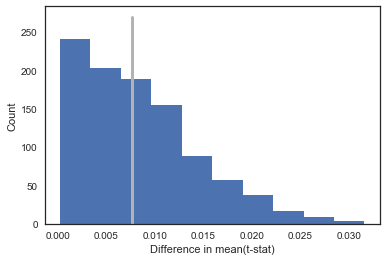

In [52]:
# Function to draw vertical line with actual Test static on the plot
def VertLine(x):
    """Draws a vertical line at x."""
    xs = [x, x]
    ys = [0, 270]
    plt.plot(xs, ys, linewidth=3, color='0.7')
VertLine(actual)

#Histogram for all test statistic values
plt.hist(test_stats)
plt.xlabel('Difference in mean(t-stat)')
plt.ylabel('Count')
plt.show()

In [53]:
# p-value calculation
p_value = sum(test_stats>=actual)/len(test_stats)
p_value

0.503

Since the p-value is high , the null hypothesis is accepted.
Our initial assumption of Female customers exited more than Male customers is actually false.

**Linear Regression

In [54]:
# Statsmodels provide ols method (ordinary least squares) for linear regression
import statsmodels.formula.api as smf
formula = 'Churn ~ MonthlyCharges'
model = smf.ols(formula, data=telco_df)
results = model.fit()
# Intercept of the fit line
inter = results.params['Intercept']

# Slope of the fit line
slope = results.params['MonthlyCharges']
inter, slope

(0.08161243063511497, 0.0028374403629179154)

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     273.5
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.71e-60
Time:                        20:02:01   Log-Likelihood:                -4101.7
No. Observations:                7043   AIC:                             8207.
Df Residuals:                    7041   BIC:                             8221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0816      0.012      6.661      0.000       0.058       0.106
MonthlyCharges     0.0028      0.000     16.537      0.000       0.003       0.003
==============================================================================
Omnibus:                     1553.125   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1347.805
Skew:                           0.985   Prob(JB):                    2.13e-293
Kurtosis:                       2.155   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model = smf.logit('Churn ~ MonthlyCharges', data=telco_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.559294
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 May 2020   Pseudo R-squ.:                 0.03336
Time:                        20:06:29   Log-Likelihood:                -3939.1
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                 4.321e-61
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.0671      0.074    -27.857      0.000      -2.212      -1.922
MonthlyCharges     0.0154      0.001     15.941      0.000       0.014       0.017
==================================================================================
"""

Interpretition:

1. SeniorCitizen variable is statistically significant since p value is 0.
2. Coefficient of Age variable is 0.0154 which means for every year increase in Age, Exit value's log odds would 
    increase by 1.54%.
3. R-squared value is 0.03336 that means the model can only explain 3.3% of the overall variance of the data. That's not 
    a lot of predictive power.

In [58]:
model = smf.logit('Churn ~ MonthlyCharges + tenure', data=telco_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.453951
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 May 2020   Pseudo R-squ.:                  0.2154
Time:                        20:09:29   Log-Likelihood:                -3197.2
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.8024      0.087    -20.824      0.000      -1.972      -1.633
MonthlyCharges     0.0330      0.001     25.373      0.000       0.030       0.035
tenure            -0.0548      0.002    -32.474      0.000      -0.058      -0.052
==================================================================================
"""

Interpretition:

1. SeniorCitizen and Tenure variables are statistically significant since their p value is 0.
2. Coefficient of Tenure variable is -0.0548 which means for every year increase in Tenure, 
    Churn value's log odds would decrease by 5.48%.
3. R-squared value is 0.2154 that means the model can only explain 21.54% of the overall variance of the data. 
    That's not a lot of predictive power.

In [59]:
# Lets create two dataframes. one for target variable and another for predictive variables
# Target variable
endog = pd.DataFrame(model.endog, columns=[model.endog_names])

#Predictive variables
exog = pd.DataFrame(model.exog, columns=model.exog_names)

# If you don't know anything about the model and 
# if you're asked to guess customer exit status then, you would guess it as the mean of the avaialble Exit statuses
# so, that's what I did below and called it as Baseline
actual = endog['Churn']
# Baseline 
baseline = actual.mean()
baseline

0.2653698707936959

**Accuracy of the model

In [60]:
#I'm using the results from logistic model to predict accuracy 
predict = (results.predict() >= 0.5)

#True positives
true_pos = predict * actual

#True negatives
true_neg = (1 - predict) * (1 - actual)

#Accuracy
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.7846088314638648

The accuracy of the logistic regression model is 78.46% which is much better than the baseline model.
